In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Load the dataset from the given URL
dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(dataset_url)

In [3]:
# Check the balance of the dataset by looking at the distribution of the target variable 'Survived'
survived_counts = df['Survived'].value_counts()

print("Distribution of the target variable 'Survived':")
print(survived_counts)

# Check if the dataset is balanced
if abs(survived_counts[0] - survived_counts[1]) <= 0.1 * len(df):
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

Distribution of the target variable 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64
The dataset is not balanced.


In [4]:
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Handling Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Dropping 'Cabin' due to many missing values

C:\Users\419376\AppData\Local\Temp\ipykernel_32140\1308809407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\419376\AppData\Local\Temp\ipykernel_32140\1308809407.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [10]:
# Encoding Categorical Data
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

C:\Users\419376\AppData\Local\Temp\ipykernel_32140\3913141939.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates[feature] = df.groupby(feature)['Survived'].mean()


<Figure size 1200x600 with 0 Axes>

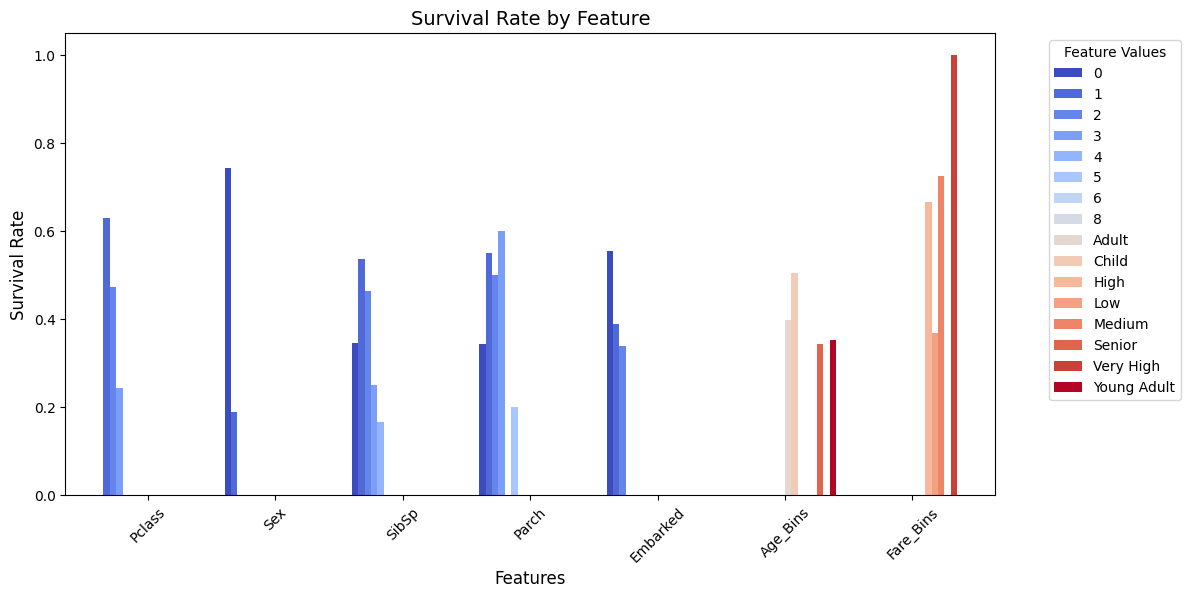


🔹 Most Influencing Features on Survival (Percentage-Based) 🔹
Sex         90.38 %
Embarked      9.0 %
Survived     0.35 %
Pclass       0.12 %
Fare         0.09 %
Parch        0.03 %
Age          0.02 %
SibSp        0.01 %
dtype: object


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Load dataset (if not already loaded)
# df = pd.read_csv("titanic.csv")

# Encode categorical features
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'].astype(str))  # Convert to string to handle NaNs

# Convert numerical features into categories for visualization
df['Age_Bins'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df['Fare_Bins'] = pd.cut(df['Fare'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Selecting relevant features (categorical + numerical)
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Bins', 'Fare_Bins']

# Calculate the average survival rate for each category in all features
survival_rates = {}
for feature in features:
    survival_rates[feature] = df.groupby(feature)['Survived'].mean()

# Convert to DataFrame for visualization
survival_df = pd.DataFrame(survival_rates).T  # Transpose for better plotting

# Plot the survival rates
plt.figure(figsize=(12, 6))
survival_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting
plt.title("Survival Rate by Feature", fontsize=14)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.legend(title="Feature Values", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# ----------------------------------------------
# 📌 Find Most Influencing Features (Converted to Percentage)
# ----------------------------------------------

# 1️⃣ Compute Correlation for Numerical Features
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()['Survived'].abs().sort_values(ascending=False)

# 2️⃣ Compute Chi-Square for Categorical Features
chi2_results = {}
for feature in ['Sex', 'Embarked']:
    contingency_table = pd.crosstab(df[feature], df['Survived'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = chi2

# ✅ FIXED: Normalize Importance to Percentage
feature_importance = pd.concat([pd.Series(chi2_results), corr])
feature_importance = (feature_importance / feature_importance.sum()) * 100  # Convert to percentage
feature_importance = feature_importance.sort_values(ascending=False)  # Sort after conversion

# Print the most important features
print("\n🔹 Most Influencing Features on Survival (Percentage-Based) 🔹")
print(feature_importance.round(2).astype(str) + " %")  # Round to 2 decimal places & add '%' sign


In [12]:
# Selecting Features and Target Variable
features = ['Sex','Embarked','Pclass','Fare','Parch','Age','SibSp']
target = 'Survived'
X = df[features]
y = df[target]

In [13]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Check the balance of the dataset by looking at the distribution of the target variable 'Survived'
survived_counts = df['Survived'].value_counts()

print("Distribution of the target variable 'Survived':")
print(survived_counts)

# Check if the dataset is balanced
if abs(survived_counts[0] - survived_counts[1]) <= 0.1 * len(df):
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

Distribution of the target variable 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64
The dataset is not balanced.


In [15]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Display the first few rows of the preprocessed data
print(pd.DataFrame(X_train, columns=features).head())

        Sex  Embarked    Pclass      Fare     Parch       Age     SibSp
0  0.737695  0.585954 -1.566107 -0.074583 -0.473674  1.240235 -0.474545
1  0.737695  0.585954 -0.369365 -0.386671 -0.473674 -0.488887 -0.474545
2  0.737695  0.585954  0.827377 -0.488854 -0.473674  0.202762 -0.474545
3  0.737695  0.585954  0.827377 -0.490280 -0.473674 -0.258337  0.432793
4 -1.355574  0.585954  0.827377 -0.018709  2.008933 -1.795334  3.154809


In [17]:
# Applying SMOTE only to the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution after SMOTE
print("Class distribution after SMOTE balancing:")
print(y_train_resampled.value_counts(normalize=True) * 100)

# Normalize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same transformation to test set

Class distribution after SMOTE balancing:
Survived
0    50.0
1    50.0
Name: proportion, dtype: float64


In [18]:

# Build a deeper neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    
    layers.Dense(64, activation='relu'),
    BatchNormalization(),   # Normalizes layer inputs
    Dropout(0.3),           # Prevents overfitting
    
    layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    layers.Dense(8, activation='relu'),
    
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Use Adam optimizer with learning rate decay
optimizer = Adam(learning_rate=0.001)  

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4025 - loss: 1.2338 - val_accuracy: 0.5810 - val_loss: 0.6659
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 0.9198 - val_accuracy: 0.6704 - val_loss: 0.6423
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 0.8178 - val_accuracy: 0.7542 - val_loss: 0.6261
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5431 - loss: 0.7282 - val_accuracy: 0.7542 - val_loss: 0.6061
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6010 - loss: 0.6597 - val_accuracy: 0.7989 - val_loss: 0.5828
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.5998 - val_accuracy: 0.7989 - val_loss: 0.5651
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.6032 - val_accuracy: 0.7989 - val_loss: 0.5420
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 0.6111 - val_accuracy: 0.7877 - val_loss:

In [21]:
# Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.8156
Precision: 0.8475
Recall: 0.6757
F1-score: 0.7519


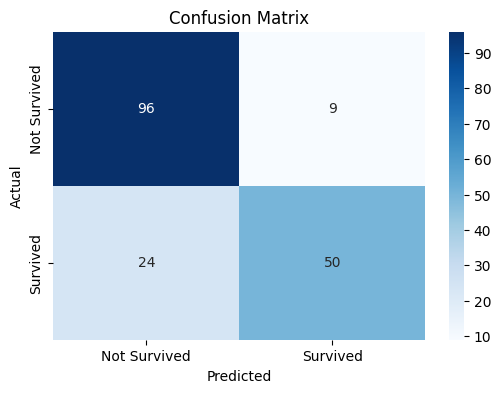

In [22]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

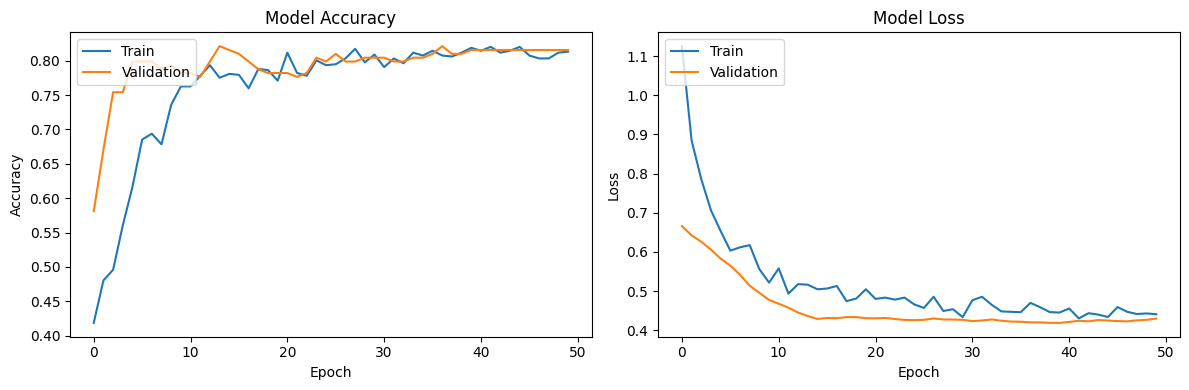

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


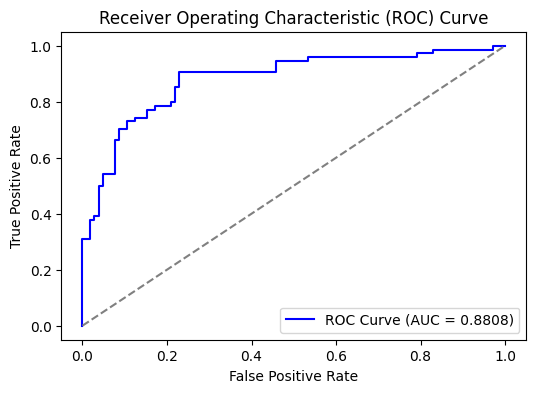

In [24]:
# ROC Curve
y_pred_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
# Conclusion
print("\nCONCLUSION:")
print("1. Key Findings and Model Performance:")
print(f"   - The model achieved an accuracy of {accuracy:.4f}, with a precision of {precision:.4f}, recall of {recall:.4f}, and an F1-score of {f1:.4f}.")
print("   - The confusion matrix and ROC curve indicate a reasonable classification performance.")

print("\n2. Potential Improvements:")
print("   - Perform hyperparameter tuning (adjusting layers, neurons, learning rate, etc.).")
print("   - Try different activation functions or optimizers for better performance.")
print("   - Use advanced feature selection techniques to improve data representation.")

print("\n3. Further Enhancements:")
print("   - Experiment with deeper networks or convolutional layers for better feature extraction.")
print("   - Use ensemble methods like bagging or boosting to combine multiple models for better accuracy.")
print("   - Explore transfer learning using pre-trained models for feature extraction.")



CONCLUSION:
1. Key Findings and Model Performance:
   - The model achieved an accuracy of 0.8156, with a precision of 0.8475, recall of 0.6757, and an F1-score of 0.7519.
   - The confusion matrix and ROC curve indicate a reasonable classification performance.

2. Potential Improvements:
   - Perform hyperparameter tuning (adjusting layers, neurons, learning rate, etc.).
   - Try different activation functions or optimizers for better performance.
   - Use advanced feature selection techniques to improve data representation.

3. Further Enhancements:
   - Experiment with deeper networks or convolutional layers for better feature extraction.
   - Use ensemble methods like bagging or boosting to combine multiple models for better accuracy.
   - Explore transfer learning using pre-trained models for feature extraction.
